load 30m poloniex data

In [1]:
cd ..

/media/oldhome/wassname/Documents/projects/rl-portfolio-gh/rl-portfolio-management


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [32]:
dfs=[]
for infile in glob.glob('./data/poloniex_teachmehowtotrade/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open','volume','quoteVolume']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [33]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)
[(df.name,df.index[0]) for df in dfs]

[('LTCBTC', Timestamp('2014-01-18 04:00:00', freq='30T')),
 ('DOGEBTC', Timestamp('2014-01-21 22:30:00', freq='30T')),
 ('DASHBTC', Timestamp('2014-02-07 20:30:00', freq='30T')),
 ('XMRBTC', Timestamp('2014-05-19 05:30:00', freq='30T')),
 ('XRPBTC', Timestamp('2014-08-14 03:30:00', freq='30T')),
 ('BTCUSDT', Timestamp('2015-02-19 19:00:00', freq='30T')),
 ('ETHBTC', Timestamp('2015-08-08 05:00:00', freq='30T')),
 ('ETHUSDT', Timestamp('2015-08-08 06:00:00', freq='30T')),
 ('ETCBTC', Timestamp('2016-07-24 04:00:00', freq='30T')),
 ('ETCETH', Timestamp('2016-07-24 04:30:00', freq='30T')),
 ('REPETH', Timestamp('2016-10-04 18:30:00', freq='30T')),
 ('REPBTC', Timestamp('2016-10-04 18:30:00', freq='30T')),
 ('GNTBTC', Timestamp('2017-02-18 03:30:00', freq='30T')),
 ('GNTETH', Timestamp('2017-02-18 03:30:00', freq='30T'))]

In [34]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [35]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2014-01-18 04:00:00', '2014-01-21 22:30:00', '2014-02-07 20:30:00', '2014-05-19 05:30:00']


In [36]:
# something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
blacklist = ['DOGEBTC', 'XRPBTC']
dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [37]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 14 to 3


In [38]:
# reindex
mi = dfs1[0].index.copy()
for i in range(len(dfs1)):
    name = dfs1[i].name
    dfs[i]=dfs1[i].reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]=0
    dfs[i].name = name

In [39]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair                   LTCBTC                                            \
Price                   close      high       low      open      volume   
date                                                                      
2014-01-18 04:00:00  0.028000  0.028000  0.028000  0.028000    0.020590   
2014-01-18 04:30:00  0.028500  0.029000  0.028000  0.029000    0.003106   
2014-01-18 05:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 05:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 06:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 06:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 07:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 07:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 08:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 08:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 09:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 09:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 10:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 10:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 11:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 11:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 12:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 12:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 13:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 13:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 14:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 14:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 15:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 15:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 16:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 16:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 17:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 17:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 18:00:00  0.028500  0.028500  0.028500  0.028500    0.000000   
2014-01-18 18:30:00  0.028500  0.028500  0.028500  0.028500    0.000000   
...                       ...       ...       ...       ...         ...   
2017-07-13 09:00:00  0.019103  0.019238  0.019043  0.019215  102.001835   
2017-07-13 09:30:00  0.019013  0.019128  0.019005  0.019103  115.373214   
2017-07-13 10:00:00  0.019098  0.019100  0.019000  0.019032   50.748214   
2017-07-13 10:30:00  0.019193  0.019200  0.019087  0.019100   35.057789   
2017-07-13 11:00:00  0.019300  0.019500  0.019193  0.019200  181.517873   
2017-07-13 11:30:00  0.019386  0.019455  0.019300  0.019300  110.352974   
2017-07-13 12:00:00  0.019363  0.019492  0.019345  0.019386   87.880708   
2017-07-13 12:30:00  0.019385  0.019388  0.019257  0.019345   66.806285   
2017-07-13 13:00:00  0.019227  0.019388  0.019086  0.019385  176.470996   
2017-07-13 13:30:00  0.019200  0.019258  0.019135  0.019227   53.844416   
2017-07-13 14:00:00  0.019073  0.019202  0.019037  0.019202  120.209105   
2017-07-13 14:30:00  0.019210  0.019210  0.019036  0.019079  117.144992   
2017-07-13 15:00:00  0.019214  0.019268  0.019150  0.019187   60.409080   
2017-07-13 15:30:00  0.019110  0.019275  0.019100  0.019216  131.437257   
2017-07-13 16:00:00  0.019087  0.019186  0.018950  0.019110  352.480444   
2017-07-13 16:30:00  0.019220  0.019220  0.019085  0.019087   71.181496   
2017-07-13 17:00:00  0.019203  0.019245  0.019101  0.019220  104.015164   
2017-07-13 17:30:00  0.019021  0.019194  0.018983  0.019180  114.901113   
2017-07-13 18:00:00  0.019112  0.019112  0.018986  0.019045   61.162994   
2017-07-13 18:30:00  0.01

In [40]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 61096
to 55284


In [41]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
df

Pair                   LTCBTC                                            \
Price                   close      high       low      open      volume   
date                                                                      
2014-05-19 06:00:00  0.023234  0.023234  0.023234  0.023234    0.538670   
2014-05-19 06:30:00  0.023421  0.023421  0.023421  0.023421    0.022663   
2014-05-19 07:00:00  0.023038  0.023100  0.023038  0.023100    0.005663   
2014-05-19 07:30:00  0.023029  0.023029  0.023029  0.023029    0.005128   
2014-05-19 08:00:00  0.023026  0.023420  0.023026  0.023029    0.353329   
2014-05-19 08:30:00  0.023025  0.023420  0.023025  0.023025    0.031986   
2014-05-19 09:00:00  0.023025  0.023025  0.023025  0.023025    0.014403   
2014-05-19 09:30:00  0.023025  0.023200  0.023025  0.023200    0.022038   
2014-05-19 10:00:00  0.023025  0.023200  0.023025  0.023200    0.037687   
2014-05-19 10:30:00  0.023025  0.023200  0.023025  0.023200    0.007686   
2014-05-19 11:00:00  0.023418  0.023418  0.023418  0.023418    0.023418   
2014-05-19 11:30:00  0.023025  0.023025  0.023025  0.023025    0.059156   
2014-05-19 12:00:00  0.023414  0.023414  0.023414  0.023414    0.068545   
2014-05-19 12:30:00  0.023409  0.023409  0.023409  0.023409    0.001400   
2014-05-19 13:00:00  0.023025  0.023408  0.023025  0.023408    0.094094   
2014-05-19 13:30:00  0.023025  0.023400  0.023025  0.023400    0.030565   
2014-05-19 14:00:00  0.023408  0.023408  0.023025  0.023050    0.073974   
2014-05-19 14:30:00  0.023408  0.023408  0.023408  0.023408    0.000000   
2014-05-19 15:00:00  0.023160  0.023408  0.023160  0.023408    0.019881   
2014-05-19 15:30:00  0.023408  0.023408  0.023001  0.023160    0.934453   
2014-05-19 16:00:00  0.023001  0.023407  0.023001  0.023407    0.363492   
2014-05-19 16:30:00  0.023001  0.023200  0.023001  0.023001    0.271593   
2014-05-19 17:00:00  0.023001  0.023200  0.023001  0.023001    0.055575   
2014-05-19 17:30:00  0.023001  0.023191  0.023001  0.023001    0.679097   
2014-05-19 18:00:00  0.023200  0.023200  0.023191  0.023191    0.115721   
2014-05-19 18:30:00  0.023001  0.023200  0.023001  0.023200    0.014856   
2014-05-19 19:00:00  0.023402  0.023402  0.023001  0.023001    0.047459   
2014-05-19 19:30:00  0.023402  0.023402  0.023402  0.023402    0.107424   
2014-05-19 20:00:00  0.023402  0.023402  0.023001  0.023402    0.054595   
2014-05-19 20:30:00  0.023402  0.023402  0.023402  0.023402    0.599039   
...                       ...       ...       ...       ...         ...   
2017-07-13 09:00:00  0.019103  0.019238  0.019043  0.019215  102.001839   
2017-07-13 09:30:00  0.019012  0.019128  0.019005  0.019103  115.373215   
2017-07-13 10:00:00  0.019098  0.019100  0.019000  0.019032   50.748215   
2017-07-13 10:30:00  0.019193  0.019200  0.019087  0.019100   35.057789   
2017-07-13 11:00:00  0.019300  0.019500  0.019193  0.019200  181.517868   
2017-07-13 11:30:00  0.019386  0.019455  0.019300  0.019300  110.352974   
2017-07-13 12:00:00  0.019363  0.019492  0.019345  0.019386   87.880707   
2017-07-13 12:30:00  0.019385  0.019388  0.019257  0.019345   66.806282   
2017-07-13 13:00:00  0.019227  0.019388  0.019086  0.019385  176.470993   
2017-07-13 13:30:00  0.019200  0.019258  0.019135  0.019227   53.844418   
2017-07-13 14:00:00  0.019073  0.019202  0.019037  0.019202  120.209106   
2017-07-13 14:30:00  0.019210  0.019210  0.019036  0.019079  117.144989   
2017-07-13 15:00:00  0.019214  0.019268  0.019150  0.019187   60.409081   
2017-07-13 15:30:00  0.019110  0.019275  0.019100  0.019216  131.437256   
2017-07-13 16:00:00  0.019087  0.019186  0.018950  0.019110  352.480438   
2017-07-13 16:30:00  0.019220  0.019220  0.019085  0.019087   71.181496   
2017-07-13 17:00:00  0.019203  0.019245  0.019101  0.019220  104.015167   
2017-07-13 17:30:00  0.019021  0.019194  0.018983  0.019180  114.901115   
2017-07-13 18:00:00  0.019112  0.019112  0.018986  0.019045   61.162994   
2017-07-13 18:30:00  0.01

In [42]:
# check stats
df.describe()

Pair         LTCBTC                                                          \
Price         close          high           low          open        volume   
count  55284.000000  55284.000000  55284.000000  55284.000000  55284.000000   
mean       0.009219      0.009257      0.009180      0.009219     40.719414   
std        0.003794      0.003824      0.003765      0.003794    214.729324   
min        0.003040      0.003056      0.002000      0.003040      0.000000   
25%        0.006373      0.006390      0.006351      0.006371      0.015089   
50%        0.008160      0.008182      0.008125      0.008159      0.382482   
75%        0.011325      0.011381      0.011293      0.011320      3.824190   
max        0.031700      0.032200      0.031600      0.031790  10390.376953   

Pair                       DASHBTC                                            \
Price    quoteVolume         close          high           low          open   
count   55284.000000  55284.000000  55284.000000  55284.000000  55284.000000   
mean     3502.839111      0.017816      0.017941      0.017684      0.017814   
std     16516.457031      0.017599      0.017762      0.017419      0.017594   
min         0.000000      0.003010      0.003173      0.002860      0.003010   
25%         1.549800      0.009125      0.009185      0.009074      0.009130   
50%        45.977900      0.012090      0.012142      0.012013      0.012086   
75%       562.473984      0.016693      0.016788      0.016591      0.016690   
max    731837.187500      0.120770      0.124157      0.117620      0.120900   

Pair                                     XMRBTC                              \
Price        volume   quoteVolume         close          high           low   
count  55284.000000  55284.000000  55284.000000  55284.000000  55284.000000   
mean      22.125402    593.785767      0.005719      0.005768      0.005667   
std      103.330620   1891.328735      0.005848      0.005894      0.005802   
min        0.000000      0.000000      0.000929      0.000940      0.000910   
25%        0.038011      3.969000      0.001829      0.001844      0.001808   
50%        1.065640     91.077301      0.002687      0.002711      0.002650   
75%        7.986436    493.750465      0.009999      0.010055      0.009916   
max     4456.258789  61347.714844      0.025246      0.026500      0.024150   

Pair                                              
Price          open        volume    quoteVolume  
count  55284.000000  55284.000000   55284.000000  
mean       0.005718     41.847549    4253.086914  
std        0.005848    192.169128   13965.763672  
min        0.000929      0.000000       0.000000  
25%        0.001827      0.587202     277.602768  
50%        0.002683      3.200162    1070.625854  
75%        0.010000     19.849789    3208.200928  
max        0.025250   8192.482422  570634.062500

In [43]:
assert np.isfinite(df.as_matrix()).all()

In [44]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 8291 train#: 46993 test_frac: 0.14997105853411474 cutoff_time: 2017-01-22 06:00:00


In [45]:
# save
df_train.to_hdf('./data/poloniex_30m_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('./data/poloniex_30m_vol.hf',key='test', mode='a', append=False)
df_train

Pair                   LTCBTC                                           \
Price                   close      high       low      open     volume   
date                                                                     
2014-05-19 06:00:00  0.023234  0.023234  0.023234  0.023234   0.538670   
2014-05-19 06:30:00  0.023421  0.023421  0.023421  0.023421   0.022663   
2014-05-19 07:00:00  0.023038  0.023100  0.023038  0.023100   0.005663   
2014-05-19 07:30:00  0.023029  0.023029  0.023029  0.023029   0.005128   
2014-05-19 08:00:00  0.023026  0.023420  0.023026  0.023029   0.353329   
2014-05-19 08:30:00  0.023025  0.023420  0.023025  0.023025   0.031986   
2014-05-19 09:00:00  0.023025  0.023025  0.023025  0.023025   0.014403   
2014-05-19 09:30:00  0.023025  0.023200  0.023025  0.023200   0.022038   
2014-05-19 10:00:00  0.023025  0.023200  0.023025  0.023200   0.037687   
2014-05-19 10:30:00  0.023025  0.023200  0.023025  0.023200   0.007686   
2014-05-19 11:00:00  0.023418  0.023418  0.023418  0.023418   0.023418   
2014-05-19 11:30:00  0.023025  0.023025  0.023025  0.023025   0.059156   
2014-05-19 12:00:00  0.023414  0.023414  0.023414  0.023414   0.068545   
2014-05-19 12:30:00  0.023409  0.023409  0.023409  0.023409   0.001400   
2014-05-19 13:00:00  0.023025  0.023408  0.023025  0.023408   0.094094   
2014-05-19 13:30:00  0.023025  0.023400  0.023025  0.023400   0.030565   
2014-05-19 14:00:00  0.023408  0.023408  0.023025  0.023050   0.073974   
2014-05-19 14:30:00  0.023408  0.023408  0.023408  0.023408   0.000000   
2014-05-19 15:00:00  0.023160  0.023408  0.023160  0.023408   0.019881   
2014-05-19 15:30:00  0.023408  0.023408  0.023001  0.023160   0.934453   
2014-05-19 16:00:00  0.023001  0.023407  0.023001  0.023407   0.363492   
2014-05-19 16:30:00  0.023001  0.023200  0.023001  0.023001   0.271593   
2014-05-19 17:00:00  0.023001  0.023200  0.023001  0.023001   0.055575   
2014-05-19 17:30:00  0.023001  0.023191  0.023001  0.023001   0.679097   
2014-05-19 18:00:00  0.023200  0.023200  0.023191  0.023191   0.115721   
2014-05-19 18:30:00  0.023001  0.023200  0.023001  0.023200   0.014856   
2014-05-19 19:00:00  0.023402  0.023402  0.023001  0.023001   0.047459   
2014-05-19 19:30:00  0.023402  0.023402  0.023402  0.023402   0.107424   
2014-05-19 20:00:00  0.023402  0.023402  0.023001  0.023402   0.054595   
2014-05-19 20:30:00  0.023402  0.023402  0.023402  0.023402   0.599039   
...                       ...       ...       ...       ...        ...   
2017-01-21 15:30:00  0.004240  0.004242  0.004223  0.004223   0.902628   
2017-01-21 16:00:00  0.004247  0.004247  0.004230  0.004240   3.981343   
2017-01-21 16:30:00  0.004239  0.004248  0.004233  0.004246   0.518569   
2017-01-21 17:00:00  0.004230  0.004254  0.004230  0.004248   2.802318   
2017-01-21 17:30:00  0.004222  0.004248  0.004219  0.004227   0.709948   
2017-01-21 18:00:00  0.004234  0.004238  0.004222  0.004230   0.396342   
2017-01-21 18:30:00  0.004234  0.004244  0.004228  0.004234   2.782868   
2017-01-21 19:00:00  0.004234  0.004244  0.004234  0.004234   1.762961   
2017-01-21 19:30:00  0.004219  0.004243  0.004215  0.004234   9.524260   
2017-01-21 20:00:00  0.004242  0.004242  0.004220  0.004220   2.662878   
2017-01-21 20:30:00  0.004239  0.004242  0.004223  0.004242   7.040715   
2017-01-21 21:00:00  0.004238  0.004240  0.004225  0.004239   1.381644   
2017-01-21 21:30:00  0.004222  0.004238  0.004222  0.004225   2.797171   
2017-01-21 22:00:00  0.004245  0.004245  0.004222  0.004224   5.168664   
2017-01-21 22:30:00  0.004231  0.004245  0.004227  0.004240   0.427217   
2017-01-21 23:00:00  0.004240  0.004311  0.004231  0.004231  24.080179   
2017-01-21 23:30:00  0.004236  0.004245  0.004220  0.004240   3.613784   
2017-01-22 00:00:00  0.004210  0.004268  0.004208  0.004235  10.927131   
2017-01-22 00:30:00  0.004198  0.004223  0.004185  0.004210  12.178608   
2017-01-22 01:00:00  0.004180  0.004201  0.004180  0.004185   4.309223   
2017

In [60]:
# drop cols and update multiindex
df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
df_train1 = df_train1.sort_index(axis=1)

df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
df_test1 = df_test1.sort_index(axis=1)
df_test1

Pair                  DASHBTC                                  LTCBTC  \
Price                   close      high       low      open     close   
date                                                                    
2017-01-22 06:30:00  0.016339  0.016339  0.016255  0.016255  0.004157   
2017-01-22 07:00:00  0.016251  0.016340  0.016251  0.016339  0.004172   
2017-01-22 07:30:00  0.016308  0.016308  0.016251  0.016251  0.004157   
2017-01-22 08:00:00  0.016310  0.016325  0.016215  0.016308  0.004166   
2017-01-22 08:30:00  0.016270  0.016340  0.016221  0.016221  0.004170   
2017-01-22 09:00:00  0.016250  0.016340  0.016221  0.016340  0.004151   
2017-01-22 09:30:00  0.016398  0.016460  0.016240  0.016250  0.004176   
2017-01-22 10:00:00  0.016422  0.016470  0.016325  0.016325  0.004192   
2017-01-22 10:30:00  0.016600  0.016600  0.016400  0.016422  0.004182   
2017-01-22 11:00:00  0.016616  0.016648  0.016546  0.016572  0.004192   
2017-01-22 11:30:00  0.016658  0.016678  0.016569  0.016616  0.004193   
2017-01-22 12:00:00  0.016850  0.016850  0.016600  0.016661  0.004220   
2017-01-22 12:30:00  0.016815  0.016852  0.016727  0.016849  0.004238   
2017-01-22 13:00:00  0.016733  0.016849  0.016716  0.016815  0.004215   
2017-01-22 13:30:00  0.016730  0.016864  0.016700  0.016733  0.004242   
2017-01-22 14:00:00  0.016778  0.016840  0.016708  0.016708  0.004273   
2017-01-22 14:30:00  0.016850  0.016887  0.016719  0.016778  0.004241   
2017-01-22 15:00:00  0.016800  0.016844  0.016726  0.016732  0.004221   
2017-01-22 15:30:00  0.016754  0.016755  0.016726  0.016755  0.004220   
2017-01-22 16:00:00  0.016758  0.016822  0.016699  0.016750  0.004194   
2017-01-22 16:30:00  0.016827  0.016827  0.016710  0.016710  0.004228   
2017-01-22 17:00:00  0.016844  0.016844  0.016800  0.016827  0.004219   
2017-01-22 17:30:00  0.016831  0.016870  0.016831  0.016844  0.004195   
2017-01-22 18:00:00  0.016500  0.016870  0.016481  0.016831  0.004197   
2017-01-22 18:30:00  0.016370  0.016496  0.016350  0.016496  0.004211   
2017-01-22 19:00:00  0.016437  0.016579  0.016250  0.016360  0.004205   
2017-01-22 19:30:00  0.016545  0.016574  0.016441  0.016441  0.004221   
2017-01-22 20:00:00  0.016471  0.016545  0.016400  0.016500  0.004188   
2017-01-22 20:30:00  0.016505  0.016538  0.016450  0.016500  0.004174   
2017-01-22 21:00:00  0.016600  0.016602  0.016500  0.016505  0.004182   
...                       ...       ...       ...       ...       ...   
2017-07-13 09:00:00  0.072300  0.072809  0.072012  0.072809  0.019103   
2017-07-13 09:30:00  0.072481  0.072619  0.072300  0.072425  0.019012   
2017-07-13 10:00:00  0.071730  0.072584  0.071729  0.072481  0.019098   
2017-07-13 10:30:00  0.071670  0.072127  0.071585  0.071730  0.019193   
2017-07-13 11:00:00  0.072920  0.072920  0.071670  0.071771  0.019300   
2017-07-13 11:30:00  0.073171  0.073316  0.072640  0.072640  0.019386   
2017-07-13 12:00:00  0.073020  0.073434  0.072867  0.073170  0.019363   
2017-07-13 12:30:00  0.073400  0.073400  0.073020  0.073070  0.019385   
2017-07-13 13:00:00  0.073230  0.073500  0.073221  0.073400  0.019227   
2017-07-13 13:30:00  0.073168  0.073500  0.072830  0.073230  0.019200   
2017-07-13 14:00:00  0.072918  0.073487  0.072800  0.073193  0.019073   
2017-07-13 14:30:00  0.072642  0.073489  0.072639  0.073000  0.019210   
2017-07-13 15:00:00  0.072485  0.073480  0.072056  0.072642  0.019214   
2017-07-13 15:30:00  0.071605  0.072485  0.071605  0.072298  0.019110   
2017-07-13 16:00:00  0.072035  0.072104  0.071100  0.071605  0.019087   
2017-07-13 16:30:00  0.072100  0.072486  0.071455  0.072033  0.019220   
2017-07-13 17:00:00  0.072656  0.072656  0.071630  0.072100  0.019203   
2017-07-13 17:30:00  0.072889  0.073760  0.072511  0.072635  0.019021   
2017-07-13 18:00:00  0.072943  0.073016  0.072492  0.072610  0.019112   
2017-07-13 18:30:00  0.072984  0.073311  0.072563  0.072563  0.019124   
2017-07-13 19:00:00  0.072545  0.073138  0.072381  0.07298

In [61]:
df_train1 = df_train1.sort_index(axis=1)

In [62]:
# save
df_train1.to_hdf('./data/poloniex_30m.hf',key='train', mode='w', append=False)
df_test1.to_hdf('./data/poloniex_30m.hf',key='test', mode='a', append=False)

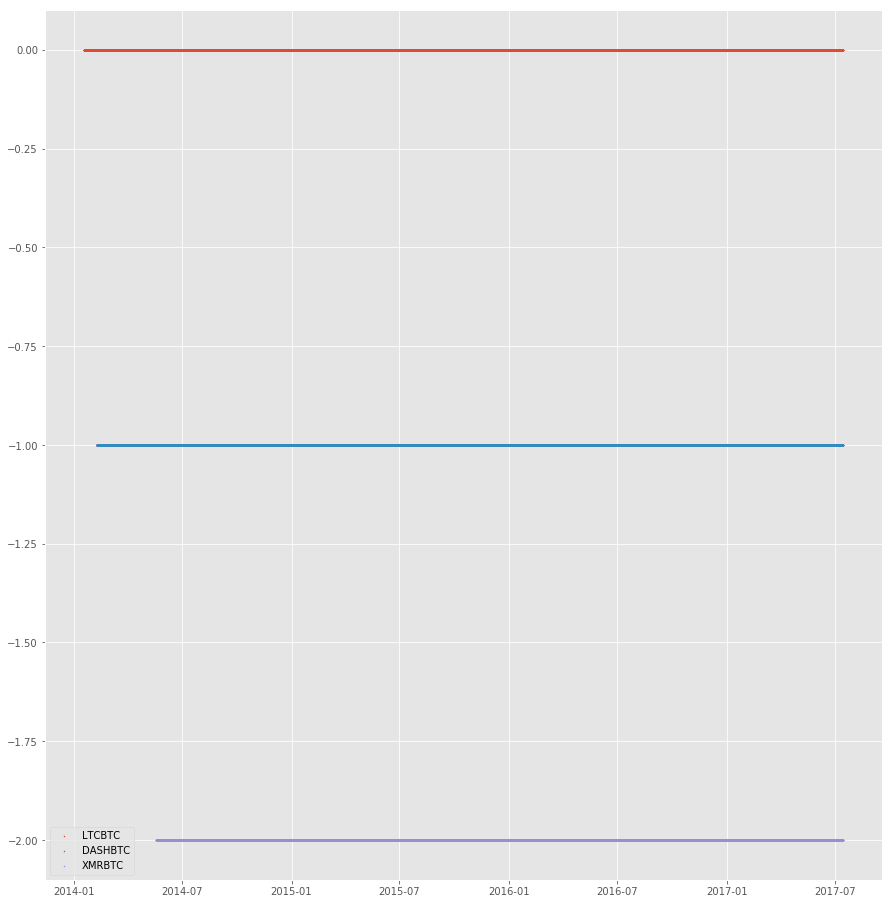

In [49]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

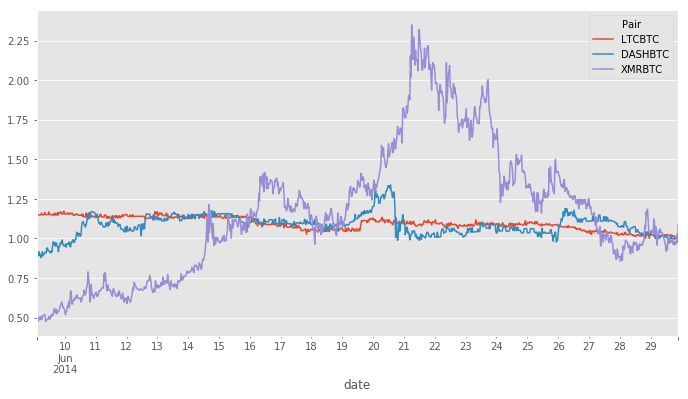

In [19]:
# View one day, normalized
data_window = df[1000:2000].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()

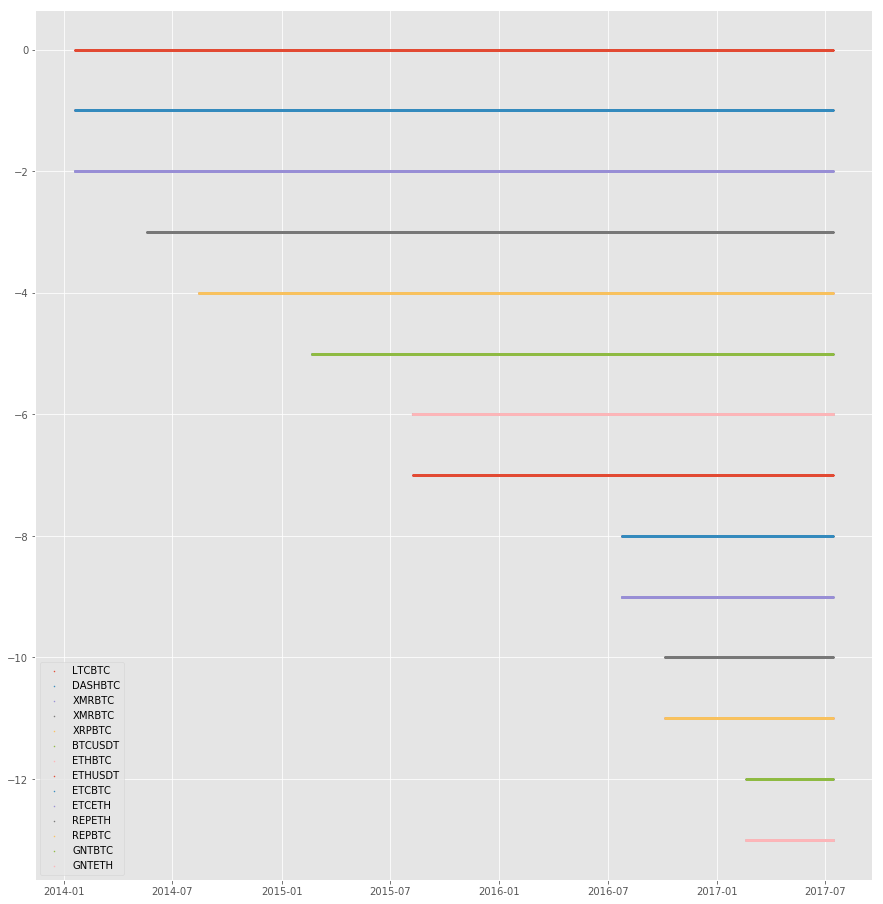

In [20]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()